### YAHOOOO Finance

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from IPython.display import display

1. Скачать с сайта finance.yahoo.com перечень ценных бумаг входящих в индекс Доу Джонса (искать ^DJI), S&P 500 (^GSPC). 

In [ ]:
path_dji='https://finance.yahoo.com/quote/%5EDJI/components?p=%5EDJI'
dji_df = pd.read_html(path_dji)[0]
dji_df.head()

In [ ]:
import requests

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

path_gspc='https://www.slickcharts.com/sp500'

r = requests.get(path_gspc, headers=header) # pretending i'm a browser

gspc_df = pd.read_html(r.text)[0]

In [ ]:
gspc_df.head()

2. Загрузить цену закрытия за 2018 год. 

In [ ]:
ticker_dji=dji_df['Symbol'].values
ticker_gspc=gspc_df['Symbol'].values

In [117]:
ticker_dji

array(['AAPL', 'IBM', 'TRV', 'KO', 'MSFT', 'HD', 'CVX', 'V', 'MCD',
       'INTC', 'BA', 'UNH', 'UTX', 'MMM', 'GS', 'AXP', 'VZ', 'CAT', 'JNJ',
       'XOM', 'NKE', 'JPM', 'CSCO', 'MRK', 'PFE', 'DIS', 'DWDP', 'PG',
       'WBA', 'WMT'], dtype=object)

In [ ]:
start=datetime.datetime(2018,1,1)
finish=datetime.datetime(2018,12,31)

In [ ]:
dji_close={ }
for i in ticker_dji:
    dji_close[i]=web.DataReader(i, 'yahoo', start, finish)['Close']

In [116]:
dji_close = pd.DataFrame(dji_close)
dji_close.head()

,AAPL,IBM,TRV,KO,MSFT,HD,CVX,V,MCD,INTC,...,NKE,JPM,CSCO,MRK,PFE,DIS,DWDP,PG,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,172.259995,154.250000,131.979996,45.540001,85.949997,188.029999,127.580002,114.510002,173.220001,46.849998,...,63.490002,107.949997,38.860001,56.220001,36.439999,111.800003,71.900002,90.650002,74.949997,98.589996
2018-01-03,172.229996,158.490005,132.399994,45.439999,86.349998,189.009995,128.509995,115.650002,172.490005,45.259998,...,63.480000,108.059998,39.169998,56.139999,36.709999,112.279999,73.050003,90.540001,75.510002,99.449997
2018-01-04,173.029999,161.699997,132.399994,46.080002,87.110001,190.509995,128.110001,116.080002,173.699997,44.430000,...,63.439999,109.040001,38.990002,57.049999,36.790001,112.230003,74.449997,91.180000,71.599998,99.540001
2018-01-05,175.000000,162.490005,132.160004,46.070000,88.190002,192.500000,127.900002,118.860001,174.050003,44.740002,...,63.980000,108.339996,39.529999,56.990002,36.860001,111.620003,75.419998,91.239998,72.919998,100.129997
2018-01-08,174.350006,163.470001,131.449997,46.000000,88.279999,192.039993,128.529999,119.339996,173.929993,44.740002,...,64.550003,108.500000,39.939999,56.660000,36.450001,110.019997,75.160004,91.720001,73.849998,101.610001


In [ ]:
ticker_gspc[3]='BRK-B'

In [ ]:
gspc_close={ }
for i in ticker_gspc[:85]:
    gspc_close[i]=web.DataReader(i, 'yahoo', start, finish)['Close']

In [ ]:
for i in ticker_gspc[85:176]:
    gspc_close[i]=web.DataReader(i, 'yahoo', start, finish)['Close']

In [ ]:
for i in ticker_gspc[176:278]:
    gspc_close[i]=web.DataReader(i, 'yahoo', start, finish)['Close']

In [92]:
from time import sleep

In [ ]:
for i in ticker_gspc[278:292]:
    gspc_close[i]=web.DataReader(i, 'yahoo', start, finish)['Close']
    sleep(10)

In [ ]:
for i in ticker_gspc[292:412]:
    gspc_close[i]=web.DataReader(i, 'yahoo', start, finish)['Close']
    sleep(10)

In [ ]:
for i in ticker_gspc[412:449]:
    gspc_close[i]=web.DataReader(i, 'yahoo', start, finish)['Close']
    sleep(20)

In [112]:
ticker_gspc[449]='BF-B'

In [ ]:
for i in ticker_gspc[449:]:
    gspc_close[i]=web.DataReader(i, 'yahoo', start, finish)['Close']
    sleep(10)

In [125]:
gspc_close = pd.DataFrame(gspc_close)
gspc_close.head()

,MSFT,AAPL,AMZN,BRK-B,FB,JNJ,GOOG,JPM,GOOGL,XOM,...,COTY,HRB,BHF,NWSA,MAC,DISCA,GT,UAA,UA,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,85.949997,172.259995,1189.010010,197.220001,181.419998,139.229996,1065.000000,107.949997,1073.209961,85.029999,...,19.879999,26.760000,57.669998,16.430000,66.610001,23.110001,32.320000,15.03,13.97,16.799999
2018-01-03,86.349998,172.229996,1204.199951,199.789993,184.669998,140.559998,1082.479980,108.059998,1091.520020,86.699997,...,19.770000,26.650000,58.509998,16.490000,65.650002,22.620001,31.860001,15.72,14.40,16.900000
2018-01-04,87.110001,173.029999,1209.589966,200.690002,184.330002,140.550003,1086.400024,109.040001,1095.760010,86.820000,...,20.080000,26.620001,59.490002,16.590000,64.000000,22.129999,32.580002,15.92,14.75,16.930000
2018-01-05,88.190002,175.000000,1229.140015,201.419998,186.850006,141.710007,1102.229980,108.339996,1110.290039,86.750000,...,20.400000,26.790001,60.630001,16.799999,64.809998,22.000000,32.840000,15.87,14.73,17.200001
2018-01-08,88.279999,174.350006,1246.869995,202.740005,188.279999,141.889999,1106.939941,108.500000,1114.209961,87.139999,...,20.320000,26.309999,60.490002,16.830000,65.230003,22.370001,33.130001,15.98,14.78,17.200001


In [128]:
gspc_close.to_csv("gspc_close.csv")

3. Построим ряды изменения процентов закрытия, т.к., используя процентые соотношения, мы лучше отследим динамику рядов  относительно друг друга, поскольку средние цены для акций разых компаний сильно разнятся и при построении на граф
ике оригинальных временных рядов ряды будут расположены на разных уровнях:

In [131]:
dji_pct=(dji_close/dji_close.shift(1)-1).fillna(0)
dji_pct.head()

,AAPL,IBM,TRV,KO,MSFT,HD,CVX,V,MCD,INTC,...,NKE,JPM,CSCO,MRK,PFE,DIS,DWDP,PG,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-03,-0.000174,0.027488,0.003182,-0.002196,0.004654,0.005212,0.007289,0.009955,-0.004214,-0.033938,...,-0.000158,0.001019,0.007977,-0.001423,0.007409,0.004293,0.015994,-0.001213,0.007472,0.008723
2018-01-04,0.004645,0.020254,0.000000,0.014085,0.008801,0.007936,-0.003113,0.003718,0.007015,-0.018338,...,-0.000630,0.009069,-0.004595,0.016209,0.002179,-0.000445,0.019165,0.007069,-0.051781,0.000905
2018-01-05,0.011385,0.004886,-0.001813,-0.000217,0.012398,0.010446,-0.001639,0.023949,0.002015,0.006977,...,0.008512,-0.006420,0.013850,-0.001052,0.001903,-0.005435,0.013029,0.000658,0.018436,0.005927
2018-01-08,-0.003714,0.006031,-0.005372,-0.001519,0.001020,-0.002390,0.004926,0.004038,-0.000690,0.000000,...,0.008909,0.001477,0.010372,-0.005791,-0.011123,-0.014334,-0.003447,0.005261,0.012754,0.014781


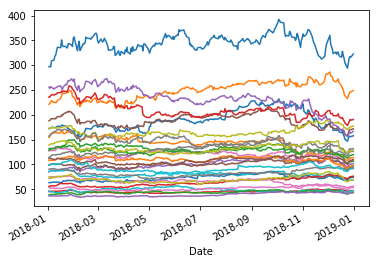

In [134]:
dji_close.plot(legend = False);

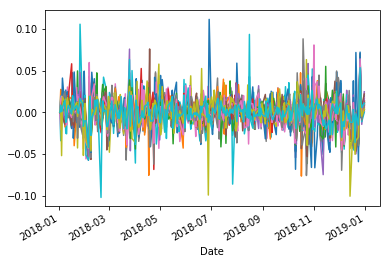

In [135]:
dji_pct.plot(legend = False);

In [132]:
gspc_pct=(gspc_close/gspc_close.shift(1)-1).fillna(0)
gspc_pct.head()

,MSFT,AAPL,AMZN,BRK-B,FB,JNJ,GOOG,JPM,GOOGL,XOM,...,COTY,HRB,BHF,NWSA,MAC,DISCA,GT,UAA,UA,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-03,0.004654,-0.000174,0.012775,0.013031,0.017914,0.009553,0.016413,0.001019,0.017061,0.019640,...,-0.005533,-0.004111,0.014566,0.003652,-0.014412,-0.021203,-0.014233,0.045908,0.030780,0.005952
2018-01-04,0.008801,0.004645,0.004476,0.004505,-0.001841,-0.000071,0.003621,0.009069,0.003884,0.001384,...,0.015680,-0.001126,0.016749,0.006064,-0.025133,-0.021662,0.022599,0.012723,0.024306,0.001775
2018-01-05,0.012398,0.011385,0.016163,0.003637,0.013671,0.008253,0.014571,-0.006420,0.013260,-0.000806,...,0.015936,0.006386,0.019163,0.012658,0.012656,-0.005874,0.007980,-0.003141,-0.001356,0.015948
2018-01-08,0.001020,-0.003714,0.014425,0.006554,0.007653,0.001270,0.004273,0.001477,0.003531,0.004496,...,-0.003922,-0.017917,-0.002309,0.001786,0.006481,0.016818,0.008831,0.006931,0.003394,0.000000


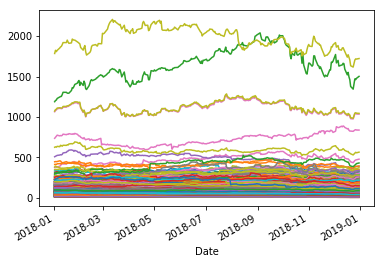

In [136]:
gspc_close.plot(legend = False);

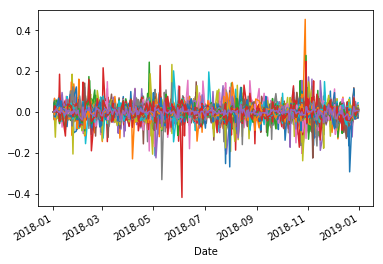

In [137]:
gspc_pct.plot(legend = False);

4. Построить взаимно-корреляционную матрицу для ценных бумаг за данный период для ряда:

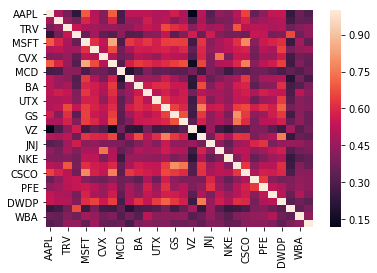

In [140]:
sns.heatmap(dji_pct.corr());

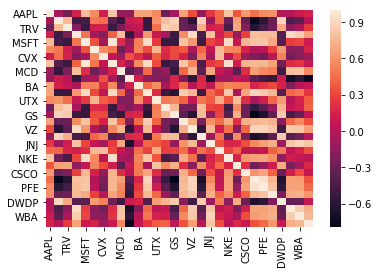

In [142]:
sns.heatmap(dji_close.corr());

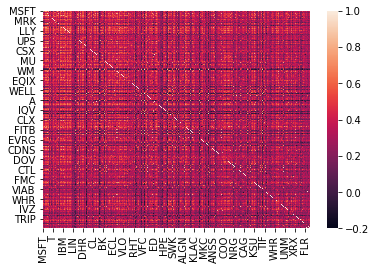

In [143]:
sns.heatmap(gspc_pct.corr());

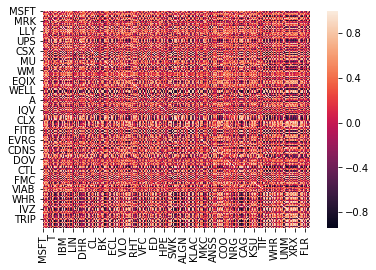

In [144]:
sns.heatmap(gspc_close.corr());

5. Выбрать порог высокой взаимной корреляции, пусть будет 0.8 и заменить значения в матрице на 1 более 0.8 и на 0 менее 0.8 

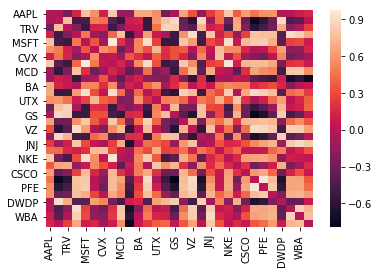

In [148]:
sns.heatmap(dji_close.corr().replace(1,0))

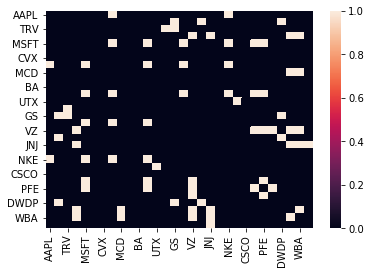

In [150]:
dji_graph=(abs(dji_close.corr().replace(1,0))>0.8).astype(int)
sns.heatmap(dji_graph)

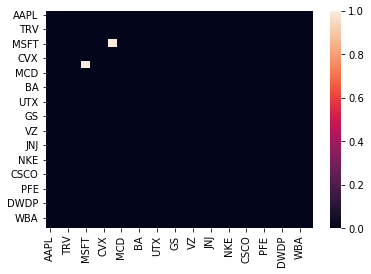

In [154]:
dji_pct_graph=(abs(dji_pct.corr().replace(1,0))>0.8).astype(int)
sns.heatmap(dji_pct_graph)

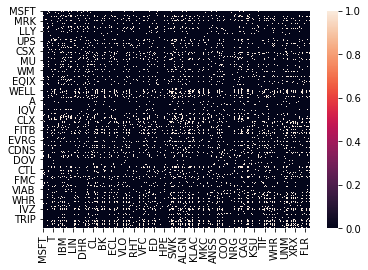

In [158]:
gscp_graph=(abs(gspc_close.corr().replace(1,0))>0.8).astype(int)
sns.heatmap(gscp_graph)

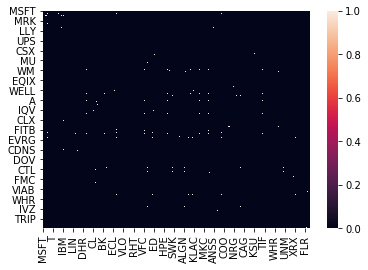

In [159]:
gscp_pct_graph=(abs(gspc_pct.corr().replace(1,0))>0.8).astype(int)
sns.heatmap(gscp_pct_graph)

6. Построить граф - пакет networkx 

/home/xenakas/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


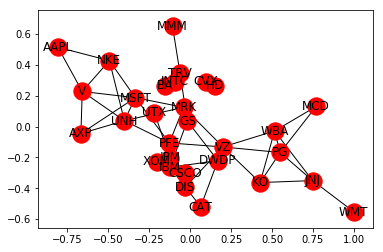

In [152]:
m=dji_graph.values
n=ticker_dji
G=nx.from_numpy_matrix(m)
G=nx.relabel_nodes(G, dict(zip(G.nodes(),n)))
nx.draw_networkx(G, pos= nx.kamada_kawai_layout(G))

/home/xenakas/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


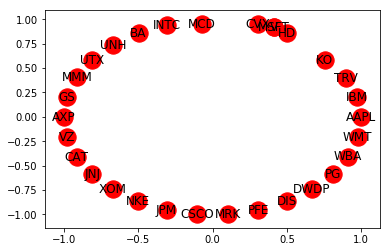

In [157]:
m1=dji_pct_graph.values
n1=ticker_dji
G1=nx.from_numpy_matrix(m1)
G1=nx.relabel_nodes(G1, dict(zip(G1.nodes(),n1)))
nx.draw_networkx(G1, pos= nx.kamada_kawai_layout(G1))

/home/xenakas/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


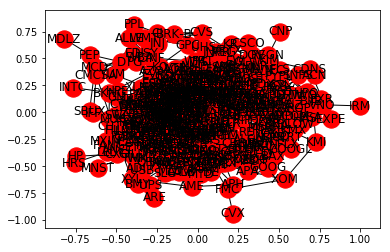

In [169]:
m2=gscp_graph.values
n2=ticker_gspc
G2=nx.from_numpy_matrix(m2)
G2=nx.relabel_nodes(G2, dict(zip(G2.nodes(),n2)))
nx.draw_networkx(G2, pos= nx.kamada_kawai_layout(G2))

/home/xenakas/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


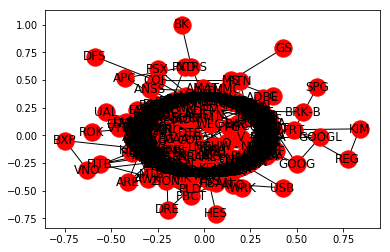

In [168]:
m3=gscp_pct_graph.values
n3=ticker_gspc
G3=nx.from_numpy_matrix(m3)
G3=nx.relabel_nodes(G3, dict(zip(G3.nodes(),n3)))
nx.draw_networkx(G3, pos= nx.kamada_kawai_layout(G3))

7. Найти клики на графе, найти максимальную клику. 

In [153]:
cliques=list(nx.find_cliques(G)) #a small close-knit group
cliques

[['JNJ', 'WMT'],
 ['JNJ', 'PG', 'WBA', 'KO'],
 ['CVX'],
 ['AXP', 'MSFT', 'V', 'UNH'],
 ['V', 'NKE', 'MSFT', 'UNH'],
 ['V', 'NKE', 'AAPL'],
 ['GS', 'IBM', 'DWDP'],
 ['GS', 'TRV'],
 ['INTC'],
 ['HD'],
 ['DWDP', 'IBM', 'CAT'],
 ['BA'],
 ['UTX', 'JPM'],
 ['UNH', 'MRK', 'MSFT', 'PFE'],
 ['TRV', 'MMM'],
 ['XOM'],
 ['VZ', 'DIS', 'PFE'],
 ['VZ', 'WBA', 'PG', 'KO'],
 ['VZ', 'PFE', 'MRK'],
 ['MCD', 'PG', 'WBA'],
 ['CSCO']]

In [170]:
cliques=list(nx.find_cliques(G3)) #a small close-knit group
cliques

[['MXIM'],
 ['CVX'],
 ['WBA'],
 ['ZTS'],
 ['SLB'],
 ['FIS'],
 ['DIS'],
 ['ABC'],
 ['FLT'],
 ['HAS'],
 ['CPRT'],
 ['FANG'],
 ['VRSN'],
 ['BSX'],
 ['SNPS'],
 ['LNT', 'NEE', 'AEE', 'WEC', 'CMS', 'DTE'],
 ['LNT', 'ATO'],
 ['LNT', 'XEL', 'AEP', 'CMS', 'AWK'],
 ['LNT', 'XEL', 'AEP', 'CMS', 'DTE', 'AEE', 'PNW', 'DUK', 'WEC', 'ED', 'ES'],
 ['LNT', 'XEL', 'AEP', 'CMS', 'DTE', 'AEE', 'PNW', 'DUK', 'WEC', 'ED', 'ETR'],
 ['LNT', 'XEL', 'EXC', 'WEC', 'ETR', 'AEE'],
 ['MHK'],
 ['UA', 'UAA'],
 ['LEG'],
 ['NVDA'],
 ['NI'],
 ['NOV'],
 ['AMAT', 'LRCX'],
 ['AOS'],
 ['KEYS'],
 ['CHRW'],
 ['HAL'],
 ['GT'],
 ['BR'],
 ['PRGO'],
 ['DHR'],
 ['PGR'],
 ['AAL', 'DAL'],
 ['WHR'],
 ['MPC', 'VLO'],
 ['WLTW'],
 ['FE'],
 ['HFC'],
 ['MMM'],
 ['SYK'],
 ['CDNS'],
 ['DXC'],
 ['CFG', 'CMA', 'KEY', 'STI', 'RF', 'MTB', 'ZION', 'HBAN', 'BBT', 'PNC'],
 ['CFG', 'CMA', 'KEY', 'STI', 'RF', 'BAC'],
 ['MSCI'],
 ['LUV'],
 ['MO'],
 ['M'],
 ['ANTM'],
 ['SCHW', 'RJF'],
 ['SCHW', 'ETFC'],
 ['ISRG'],
 ['PKG', 'WRK'],
 ['PKG', 'IP'],
 ['T